# Scaler Calculation, Saving and Loading
Notepad to create the necessary scaler for GMM for a given data set.

### Choices for data

In [1]:
dataFileName = "GMMSampleDataUK2L.npy"
scalerName = 'GMMScalerUK2L.bin'

testNumber = 5

<br>

### Libaries and Modules
Importing the necessary libaries and modules for the notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from joblib import dump, load
from sklearn import preprocessing
print("Libaries and modules loaded.")

Libaries and modules loaded.


<br>

### Importing data to fit Scaler

In [3]:
sampleDataLabelled = np.load(dataFileName)
sampleDepthAxis = sampleDataLabelled[0]
sampleData = sampleDataLabelled[1:]
print("Sample data loaded into sampleData.")

Sample data loaded into sampleData.


<br>

### Plotting functions
<b>Functions:</b>
<ul>
<li>tempPointPlot - Plots the temperature profile of a single point against depth.
</ul>

In [4]:
def tempPointPlot(dataArray, label, title, plotNo):
    '''Displays temperature profile plot for a given data set, singular point'''
    plt.figure(plotNo)
    plt.plot(dataArray, sampleDepthAxis, label = label)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(str(title))
    plt.gca().invert_yaxis()

print("Plotting functions defined.")

Plotting functions defined.


<br>

### Calculating and Saving Scaler

In [5]:
scaler = preprocessing.StandardScaler().fit(sampleData) #Calculates
dump(scaler, scalerName, compress=True) #Saves
print("Scaler Calculated and Saved in "+scalerName+".")

Scaler Calculated and Saved in GMMScalerUK2L.bin.


<br>

### Reloading the Scaler

In [6]:
scalerLoad = load(scalerName)
print("Scaler reloaded into scalerLoad.")

Scaler reloaded into scalerLoad.


<br>

### Testing of Scaler
<b>Scaling data sets</b>

In [7]:
sampleDataScaled = preprocessing.scale(sampleData) #Automatic transform
sampleDataScaled2 = scaler.transform(sampleData) #Presaved scaler
sampleDataScaled3 = scalerLoad.transform(sampleData) #Reloaded scaler
print("Sample data scaled and stored in sampleDataScaled, sampleDataScaled2 and sampleDataScaled3.")

Sample data scaled and stored in sampleDataScaled, sampleDataScaled2 and sampleDataScaled3.


<br>
<b>Plotting Results and comparison</b>

Sample 6254
2 - 1:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
3 - 2:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Sample 5519
2 - 1:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
3 - 2:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Sample 7421
2 - 1:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
3 - 2:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 

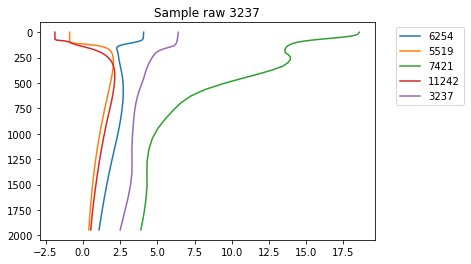

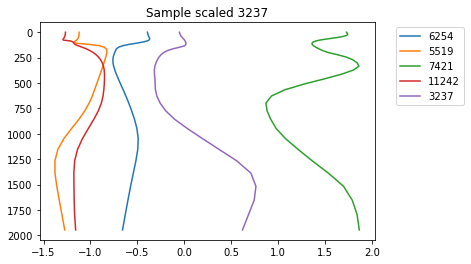

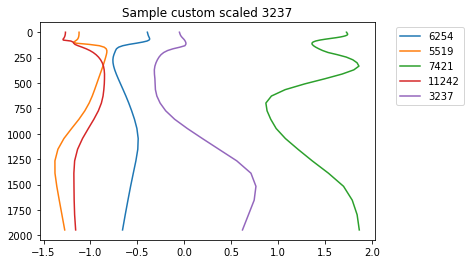

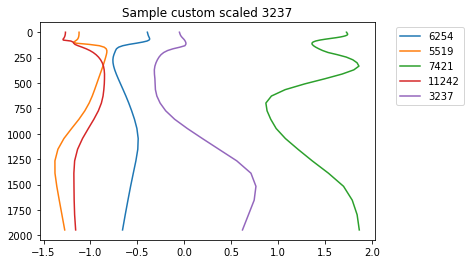

In [8]:
solo = False #Set to true for seperate plots, false for combined plots.
testRange = len(sampleData)
for i in range(testNumber):
    x = np.random.randint(testRange)
    tempPointPlot(sampleData[x], x, "Sample raw "+str(x), solo*4*i)
    tempPointPlot(sampleDataScaled[x], x, "Sample scaled "+str(x), solo*4*i+1)
    tempPointPlot(sampleDataScaled2[x], x, "Sample custom scaled "+str(x), solo*4*i+2)
    tempPointPlot(sampleDataScaled2[x], x, "Sample custom scaled "+str(x), solo*4*i+3)
    print("Sample "+str(x))
    print("2 - 1: ",sampleDataScaled2[x]-sampleDataScaled[x])
    print("3 - 2: ",sampleDataScaled3[x]-sampleDataScaled2[x])